In [15]:
%env OMP_NUM_THREADS=1

import os, sys
if os.path.basename(os.getcwd()) != 'runlmc':
    os.chdir('..')
sys.path.append('benchmarks/benchlib')
import numpy as np

from runlmc.models.interpolated_llgp import InterpolatedLLGP
from runlmc.lmc.functional_kernel import FunctionalKernel
from runlmc.kern.rbf import RBF



%matplotlib inline 
import matplotlib.pyplot as plt

np.random.seed(1234)

from runlmc.models.optimization import AdaDelta

env: OMP_NUM_THREADS=1


In [27]:
n_per_output = [65, 100]
xss = list(map(np.random.rand, n_per_output))
nout = len(n_per_output)
yss = [np.sin(2 * np.pi * xs + i * 2 * np.pi / nout)
       + np.random.randn(len(xs)) * (i + 1) * 0.1 / nout
       for i, xs in enumerate(xss)]
ks = [RBF(name='rbf{}'.format(i)) for i in range(nout)]
ranks = [1, 1]
fk = FunctionalKernel(D=len(xss), lmc_kernels=ks, lmc_ranks=ranks)

xss

[array([0.9047511 , 0.81215453, 0.0569863 , 0.77013844, 0.27670657,
        0.11668353, 0.21798473, 0.48441005, 0.03092751, 0.78261386,
        0.82378011, 0.23731408, 0.77754183, 0.37248597, 0.32581848,
        0.42104653, 0.07843628, 0.20605657, 0.49613559, 0.60667259,
        0.40627923, 0.78203015, 0.33572583, 0.12700417, 0.6719135 ,
        0.7640038 , 0.42589153, 0.49473149, 0.91935312, 0.24739229,
        0.00653854, 0.29173525, 0.03103786, 0.67202842, 0.32892783,
        0.0559642 , 0.20508414, 0.75660302, 0.19469524, 0.4022245 ,
        0.17649629, 0.81132565, 0.44503984, 0.08963711, 0.07975346,
        0.95716091, 0.23908196, 0.10793069, 0.44468799, 0.03069173,
        0.07414743, 0.32315459, 0.41820263, 0.98159421, 0.33379973,
        0.56947822, 0.6643452 , 0.25686729, 0.55330597, 0.40560749,
        0.61894983, 0.07533916, 0.32504314, 0.67602811, 0.76387483]),
 array([0.73096257, 0.20651515, 0.17728181, 0.80602999, 0.92005796,
        0.79791549, 0.37479214, 0.37494512, 0.

In [17]:
def print_diagram(lmc):
    plot_xs =  np.arange(0, 1, 0.01)
    ys, var = lmc.predict([plot_xs for _ in range(nout)])
    for i, (y, v, xs, ys) in enumerate(zip(ys, var, xss, yss)):
        sd = np.sqrt(v)
        order = xs.argsort()
        plt.scatter(xs[order], ys[order])
        plt.title('output {} (95%)'.format(i))
        plt.plot(plot_xs, y)
        plt.plot(plot_xs, y + 2 * sd, ls='--', c='g')
        plt.plot(plot_xs, y - 2 * sd, ls='--', c='g')
        plt.show()

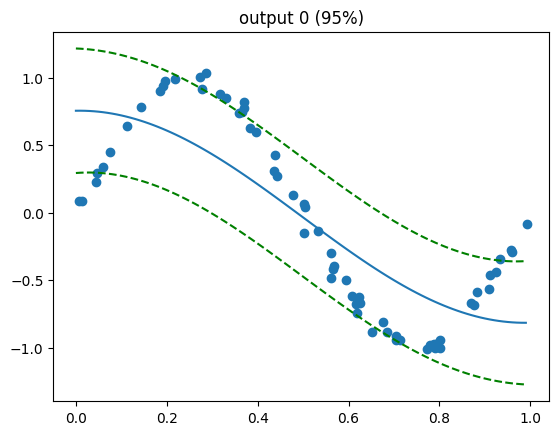

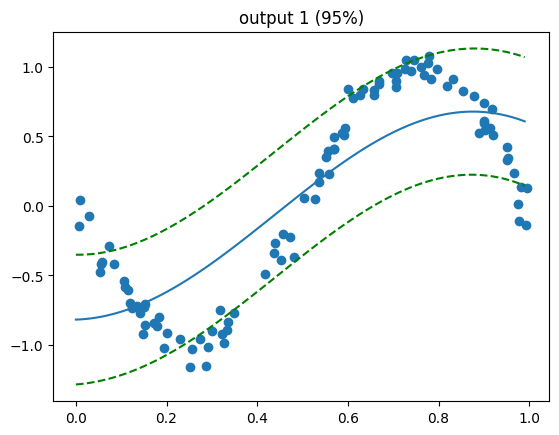

In [18]:
# Unoptimized
lmc = InterpolatedLLGP(xss, yss, functional_kernel=fk)
print_diagram(lmc)

starting adadelta {'step_rate': 1, 'decay': 0.9, 'momentum': 0.5, 'offset': 0.0001, 'max_it': 100, 'verbosity': 10, 'min_grad_ratio': 0.1, 'permitted_drops': 5, 'callback': <function AdaDelta.noop at 0x0000029A3ED04820>}
iteration       10 grad norm 3.0282e+01


MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.108159e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.164717e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.213309e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.288804e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.109185e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.179458e-04


iteration       20 grad norm 2.9364e+01


MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.079722e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.307033e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.793070e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.351292e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.326516e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.315740e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.429838e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.214319e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.316481e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.567923e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.679565e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

iteration       30 grad norm 7.5347e+00


MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.165697e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 8.106851e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.002647e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.037322e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.688595e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.870381e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.685321e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 8.099152e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.427222e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.108486e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.046512e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

finished adadelta optimization
            34 iterations
    2.8459e+00 final grad norm
    norm used inf


MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.952234e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.253274e-04



Name : lmc
Objective : -104.15088070157111
Number of Parameters : 12
Number of Optimization Parameters : 12
Updates : True
Parameters:
  lmc.                       |               value  |  constraints  |  priors
  kern.rbf0.inv_lengthscale  |  2.5638888296423628  |      +ve      |        
  kern.rbf1.inv_lengthscale  |   4.349006635027425  |      +ve      |        
  kern.a0                    |              (1, 2)  |               |        
  kern.a1                    |              (1, 2)  |               |        
  kern.kappa0                |                (2,)  |      +ve      |        
  kern.kappa1                |                (2,)  |      +ve      |        
  kern.noise                 |                (2,)  |      +ve      |        
[0.00548689 0.01626182]


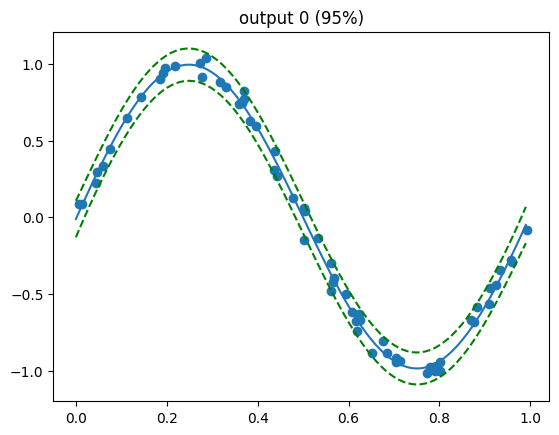

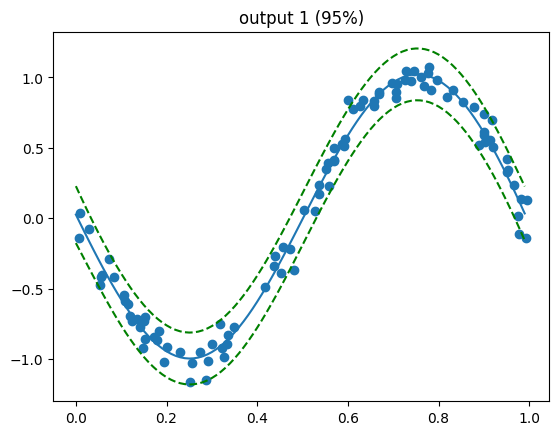

In [19]:
lmc.optimize(optimizer=AdaDelta(verbosity=10))
#optimized
print(lmc)
print(lmc.kern.noise)
print_diagram(lmc)

In [20]:
import GPy

rbfs = [GPy.kern.RBF(1) for _ in range(nout)]
# not exactly the same since mine is rank-1 only for now
# This is why we need as many kernels as outputs, because we'd be rank-deficient o/w
k = GPy.util.multioutput.LCM(input_dim=1,num_outputs=nout,kernels_list=rbfs)
xss_reshaped = [xs.reshape(-1, 1) for xs in xss]
yss_reshaped = [ys.reshape(-1, 1) for ys in yss]
m = GPy.models.GPCoregionalizedRegression(
    xss_reshaped, yss_reshaped, kernel=k)
m.optimize()
print(m)


Name : gp
Objective : -180.15398293086096
Number of Parameters : 14
Number of Optimization Parameters : 14
Updates : True
Parameters:
  gp.                                    |                   value  |  constraints  |  priors
  sum.ICM0.rbf.variance                  |     0.00491616995390036  |      +ve      |        
  sum.ICM0.rbf.lengthscale               |     0.33962275763982536  |      +ve      |        
  sum.ICM0.B.W                           |                  (2, 1)  |               |        
  sum.ICM0.B.kappa                       |                    (2,)  |      +ve      |        
  sum.ICM1.rbf.variance                  |  1.3632596098053749e-08  |      +ve      |        
  sum.ICM1.rbf.lengthscale               |      12.155254979800322  |      +ve      |        
  sum.ICM1.B.W                           |                  (2, 1)  |               |        
  sum.ICM1.B.kappa                       |                    (2,)  |      +ve      |        
  mixed_noise.Gauss

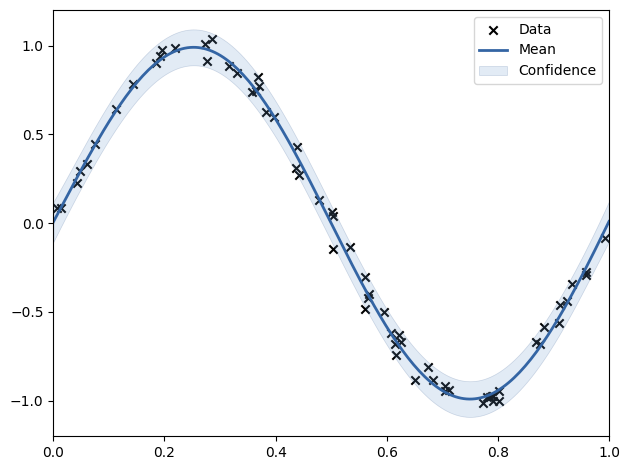

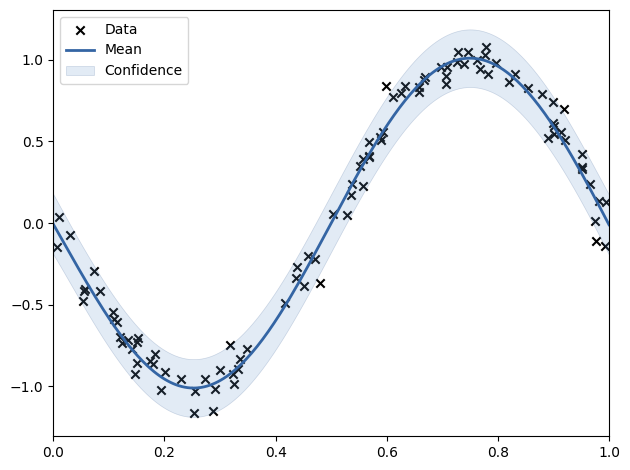

In [21]:
# Plotting code adapted from GPy coregionalization tutorial
# Also 95% confidence

data_rows = np.add.accumulate(n_per_output)
data_rows = np.insert(data_rows, 0, 0)

for i in range(nout):
    m.plot(
        plot_limits=(0, 1),
        fixed_inputs=[(1,i)],
        which_data_rows=slice(data_rows[i],data_rows[i + 1]))

In [22]:
# Adding a prior
from runlmc.parameterization.priors import InverseGamma, Gaussian, HalfLaplace

ig = InverseGamma(0.5, 0.5)
lmc.kern.rbf0.inv_lengthscale.set_prior(ig)
lmc.kern.rbf1.inv_lengthscale.set_prior(ig)

n = Gaussian(0, 1)
lmc.kern.a0.set_prior(n)
lmc.kern.a1.set_prior(n)

h = HalfLaplace(1)
lmc.kern.kappa0.set_prior(h)
lmc.kern.kappa1.set_prior(h)

lmc.optimize()

print(lmc)
print(lmc.kern.kappa0)

MINRES (n = 165) did not converge in n iterations. Reconstruction error 8.856886e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 9.166144e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.553714e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.413369e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.894178e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.314993e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 7.196834e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.090064e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.649265e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.565439e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.712340e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.467753e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.183403e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 8.164849e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.137229e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 7.010980e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 5.333960e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.349783e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.711016e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.336177e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 8.745163e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.663776e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction


Name : lmc
Objective : -72.33738082459789
Number of Parameters : 12
Number of Optimization Parameters : 12
Updates : True
Parameters:
  lmc.                       |               value  |  constraints  |         priors        
  kern.rbf0.inv_lengthscale  |  2.6593128001031547  |      +ve      |  InverseGamma(0.5,0.5)
  kern.rbf1.inv_lengthscale  |   4.532822461900453  |      +ve      |  InverseGamma(0.5,0.5)
  kern.a0                    |              (1, 2)  |               |         N(0, 1)       
  kern.a1                    |              (1, 2)  |               |         N(0, 1)       
  kern.kappa0                |                (2,)  |      +ve      |     HalfLaplace(1)    
  kern.kappa1                |                (2,)  |      +ve      |     HalfLaplace(1)    
  kern.noise                 |                (2,)  |      +ve      |                       
  index  |  lmc.kern.kappa0  |  constraints  |      priors    
  [0]    |       1.23926357  |      +ve      |  HalfLaplac

In [23]:
# Multilevel prior
from runlmc.parameterization.param import Param

# A param is anything that is modifiable during the optimization
# We add a param shape such that
# shape ~ IG(0.5, 0.5)
# rbf*.inv_lengthscale ~ IG(0.5, shape)

ig = InverseGamma(0.5, 0.5)
initial_value = 1
shape = Param('shape', initial_value)
lmc.link_parameter(shape) # wire the parameter into the model (otherwise it won't get updated)
shape.set_prior(ig)

ig2 = InverseGamma(0.5, shape)
for il in [lmc.kern.rbf0.inv_lengthscale, lmc.kern.rbf1.inv_lengthscale]:
    il.set_prior(ig2)
    
lmc.optimize(optimizer=AdaDelta())
print(lmc)
print(lmc.kern.kappa0)

MINRES (n = 165) did not converge in n iterations. Reconstruction error 7.232305e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.788084e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 6.524924e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.517598e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 7.435025e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.961925e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.793209e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 5.362892e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.925580e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.910602e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 7.670794e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.715553e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.288240e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.830615e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.104087e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 4.306431e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.130167e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.205753e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.826112e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.715103e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.178143e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.858789e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.274243e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.269705e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.783948e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.033553e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.802074e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.824577e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.475693e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.914081e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.069036e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 2.160089e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 3.163476e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.140204e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.135936e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.585357e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.332683e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.024334e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.051296e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.040356e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.552869e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.156800e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.546560e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.401094e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction

MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.325538e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.108237e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.384679e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.114129e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.013208e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.099407e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.230831e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.170504e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.183871e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.143385e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction error 1.193822e-04
MINRES (n = 165) did not converge in n iterations. Reconstruction


Name : lmc
Objective : -82.00022621726828
Number of Parameters : 13
Number of Optimization Parameters : 13
Updates : True
Parameters:
  lmc.                       |               value  |  constraints  |          priors         
  kern.rbf0.inv_lengthscale  |  0.4699109569224481  |      +ve      |  InverseGamma(0.5,shape)
  kern.rbf1.inv_lengthscale  |    8.68471943667696  |      +ve      |  InverseGamma(0.5,shape)
  kern.a0                    |              (1, 2)  |               |          N(0, 1)        
  kern.a1                    |              (1, 2)  |               |          N(0, 1)        
  kern.kappa0                |                (2,)  |      +ve      |      HalfLaplace(1)     
  kern.kappa1                |                (2,)  |      +ve      |      HalfLaplace(1)     
  kern.noise                 |                (2,)  |      +ve      |                         
  shape                      |  0.3333333320961865  |      +ve      |   InverseGamma(0.5,0.5) 
  index  |